In [3]:
# Imports
import json
from graphviz import Digraph
def aprint(string):
    """Because of Jupyter"""
    print('   ', string)

In [82]:
### Hyperparams
remove_grad_classes = True

In [142]:
# Opens and autocloses the file, binds file to f, and loads the data
with open('/home/order/Dropbox/Python_Code/Cloned/ucr-course-graph/data/201740_all_prereqs.json','r') as f:
    data = json.load(f)

# Define course object
class course:
    def __init__(self, courseName, preReq, courseID, subject):
        self.courseName = courseName
        self.preReq = preReq
        self.courseID = courseID
        self.subject = subject

# Mildly brittle parser
def parseAndOr(testString):
    if testString == dict():
        return dict()
    if len(testString.split('\n')) < 3:
        return dict()
    if 'Score for' in testString: # EXTREMELY HACKY SOLUTION
        return dict()
    mod = testString.split('and\n')
    mod = [x.split('or\n') for x in mod]
    mod = [[y.split('\n') for y in x] for x in mod]
    # mod = [[[z for z in y] for y in x] for x in mod]
    def classconvert(classname):
        intermed = classname.split(' ')
        intermed = [' '.join(intermed[:-1]), intermed[-1]]
        lookup = {
            'Computer Science':'CS',
            'Physics':'PHYS',
            'Mathematics':'MATH',
            'Electrical Engineering':'EE'
        }
        if intermed[0] in lookup:
            return lookup[intermed[0]] + intermed[1]
        else:
            return classname
    
    try:
        # This is the most horrific list comprehension I've every written, but it works
        mod = [[[
             classconvert(y[1][y[1].index('Test:')+6:].strip()), # Class name
             y[2].split(' ')[-1], # Grade
             'NC' if y[3].strip()[:7] == 'May not' else 'C' # Concurrent allowed?
                ] if y[0] == '(' else [
             classconvert(y[0][y[0].index('Test:')+6:].strip()), # Class name
             y[1].split(' ')[-1], # Grade
             'NC' if y[2].strip()[:7] == 'May not' else 'C' # Concurrent allowed?
                ] for y in x] for x in mod]
    except:
        print(testString)
        print(mod)
        raise
    return mod

courseList = []
for currentCourse in data:
    try: # Dealing with situations where prereq didn't get written
        mycourse = course(currentCourse['subjectCourse'], parseAndOr(currentCourse['prereqs']), currentCourse['id'], currentCourse['subject'])
    except KeyError:
        mycourse = course(currentCourse['subjectCourse'], dict(), currentCourse['id'], currentCourse['subject'])
    courseList.append(mycourse) # Writes course objects to a list

for i in courseList:
    if i != dict():
        aprint(i.preReq)

    {}
    {}
    {}
    {}
    [[['Anthropology 001', 'D-', 'NC'], ['Anthropology 001H', 'D-', 'NC'], ['Anthropology 001W', 'D-', 'NC']]]
    [[['Anthropology 003', 'D-', 'NC'], ['Anthropology 005', 'D-', 'NC']]]
    [[['Anthropology 003', 'D-', 'NC'], ['Anthropology 005', 'D-', 'NC']]]
    [[['Anthropology 001', 'D-', 'NC'], ['Anthropology 001H', 'D-', 'NC'], ['Anthropology 001W', 'D-', 'NC']], [['Linguistics 020', 'D-', 'NC']]]
    [[['Anthropology 001', 'D-', 'NC'], ['Anthropology 001H', 'D-', 'NC'], ['Anthropology 001W', 'D-', 'NC']]]
    [[['Linguistics 020', 'D-', 'NC']]]
    [[['Anthropology 001', 'D-', 'NC'], ['Anthropology 001H', 'D-', 'NC'], ['Anthropology 001W', 'D-', 'NC']]]
    [[['Anthropology 002', 'D-', 'NC']]]
    [[['Anthropology 002', 'D-', 'NC']]]
    {}
    [[['Anthropology 001', 'D-', 'NC'], ['Anthropology 001H', 'D-', 'NC'], ['Anthropology 001W', 'D-', 'NC']]]
    {}
    [[['Arabic Language 003', 'C-', 'NC']]]
    {}
    {}
    {}
    {}
    {}
    {}
    {}
   

In [169]:
def undergradOnly(courseList):
    numbers = set('0123456789')
    return [x for x in courseList if [y for y in x.courseName if y in numbers][0] in {'0','1'}]

def selectMajor(courseList,major):
    # Use 4-code for major (eg 'PHYS')
    return [x for x in courseList if x.subject == major]

aprint(len(courseList))
aprint(len(selectMajor(courseList,'PHYS')))

major = 'CS'
if remove_grad_classes:
    physList = undergradOnly(selectMajor(courseList,major))
else:
    physList = selectMajor(courseList,major)

dot = Digraph(comment='classflow physics')

# Initialize all nodes
for i in physList:
    dot.node(i.courseName)
    
# dot.node_attr.update(color='lightblue2', style='filled') # Make ALL nodes light blue and filled

# Define how to draw between courses (with all the relevant conditions)
def requisiteLine(fromCourse,toCourse,graph,**args):
    """fromCourse example: "['ANTH001', 'D-', 'NC']"
       toCourse example: "course" object with courseName, etc."""
    
    # Default case
    graph.edge(fromCourse[0],toCourse.courseName,**args)

# Create lines between courses
runID = 0
for i in physList:
    if i.preReq != dict():
        # i.preReq is "and_group"
        for orGroup in i.preReq:
            if len(orGroup) > 1:
                # draw box
                with dot.subgraph(name='cluster_' + str(runID)) as c:
                    for classInfo in orGroup:
                        # c.attr(style='filled')
                        # c.attr(color='lightgrey')
                        # c.node_attr.update(style='filled', color='white')
                        requisiteLine(classInfo,i,dot,style='dashed')
                runID += 1
            else:
                requisiteLine(orGroup[0],i,dot)
#         for k in i.preReq['and']:
#             requisiteLine(k,i)
#         for k in i.preReq['or']:
#             requisiteLine(k,i, style='dashed')

    818
    24


In [172]:
dot.render(filename='./test',view=True,format='png')

'./test.png'

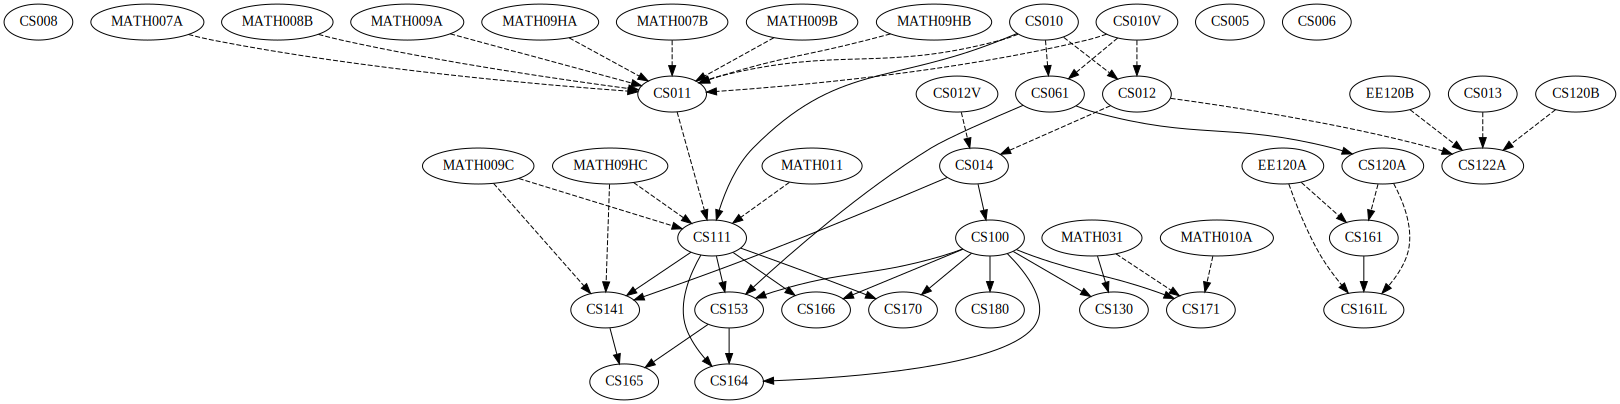

In [170]:
dot

In [74]:
def lookup(someCourse):
    return [x for x in physList if x.courseName == someCourse]
print(lookup('PHYS002B')[0].preReq)
print(lookup('PHYS040C')[0].preReq)

{'and': [{'course': 'PHYS002A', 'minGrade': 'C-', 'disallowConcurrent': True}], 'or': [{'course': 'MATH009B', 'minGrade': 'D-', 'disallowConcurrent': False}, {'course': 'MATH09HB', 'minGrade': 'D-', 'disallowConcurrent': False}]}
{'and': [{'course': 'PHYS040B', 'minGrade': 'C-', 'disallowConcurrent': True}, {'course': 'MATH009C', 'minGrade': 'D-', 'disallowConcurrent': True}], 'or': [{'course': 'MATH09HC', 'minGrade': 'D-', 'disallowConcurrent': True}]}


In [118]:
testString = '''(
 Course or Test: Computer Science 010 
 Minimum Grade of D-
 May not be taken concurrently.  )
and
(
 Course or Test: Computer Science 011 
 Minimum Grade of D-
 May not be taken concurrently.  )
or
(
 Course or Test: Mathematics 011 
 Minimum Grade of D-
 May not be taken concurrently.  )
and
(
 Course or Test: Mathematics 009C 
 Minimum Grade of D-
 May not be taken concurrently.  )
or
(
 Course or Test: Mathematics 09HC 
 Minimum Grade of D-
 May not be taken concurrently.'''
repr(testString)

"'(\\n Course or Test: Computer Science 010 \\n Minimum Grade of D-\\n May not be taken concurrently.  )\\nand\\n(\\n Course or Test: Computer Science 011 \\n Minimum Grade of D-\\n May not be taken concurrently.  )\\nor\\n(\\n Course or Test: Mathematics 011 \\n Minimum Grade of D-\\n May not be taken concurrently.  )\\nand\\n(\\n Course or Test: Mathematics 009C \\n Minimum Grade of D-\\n May not be taken concurrently.  )\\nor\\n(\\n Course or Test: Mathematics 09HC \\n Minimum Grade of D-\\n May not be taken concurrently.'"

In [119]:
mod = testString.split('and\n')
mod = [x.split('or\n') for x in mod]
mod = [[y.split('\n') for y in x] for x in mod]
mod = [[[
         y[1][y[1].index('Test:')+6:].strip(), # Class name
         y[2].split(' ')[-1], # Grade
         'NC' if y[3].strip()[:7] == 'May not' else 'C' # Concurrent allowed?
        ] for y in x] for x in mod]
print(mod)

[[['Computer Science 010', 'D-', 'NC']], [['Computer Science 011', 'D-', 'NC'], ['Mathematics 011', 'D-', 'NC']], [['Mathematics 009C', 'D-', 'NC'], ['Mathematics 09HC', 'D-', 'NC']]]


In [91]:
testing = [[['AWPE: Sc'], ['e f'], [' Prereq 602 to 603', ' May not be taken concurrently.  )', ''], ['', '(', ' Course '], [' Test: Basic Writing 001 ', ' Minimum Grade of S', ' May not be taken concurrently. ']]]
testing = [[y for y in x] for x in testing if x[1] == ['e f']]
print(testing)

[[['AWPE: Sc'], ['e f'], [' Prereq 602 to 603', ' May not be taken concurrently.  )', ''], ['', '(', ' Course '], [' Test: Basic Writing 001 ', ' Minimum Grade of S', ' May not be taken concurrently. ']]]


In [93]:
for x in testing:
    for y in x:
        print(y)

['AWPE: Sc']
['e f']
[' Prereq 602 to 603', ' May not be taken concurrently.  )', '']
['', '(', ' Course ']
[' Test: Basic Writing 001 ', ' Minimum Grade of S', ' May not be taken concurrently. ']


In [113]:
astring = "(\n Course or Test: Computer Science 010 \n Minimum Grade of D-\n May not be taken concurrently.  )\nand\n(\n Course or Test: Computer Science 011 \n Minimum Grade of D-\n May not be taken concurrently.  )\nor\n(\n Course or Test: Mathematics 011 \n Minimum Grade of D-\n May not be taken concurrently.  )\nand\n(\n Course or Test: Mathematics 009C \n Minimum Grade of D-\n May not be taken concurrently.  )\nor\n(\n Course or Test: Mathematics 09HC \n Minimum Grade of D-\n May not be taken concurrently. "
print(astring)

(
 Course or Test: Computer Science 010 
 Minimum Grade of D-
 May not be taken concurrently.  )
and
(
 Course or Test: Computer Science 011 
 Minimum Grade of D-
 May not be taken concurrently.  )
or
(
 Course or Test: Mathematics 011 
 Minimum Grade of D-
 May not be taken concurrently.  )
and
(
 Course or Test: Mathematics 009C 
 Minimum Grade of D-
 May not be taken concurrently.  )
or
(
 Course or Test: Mathematics 09HC 
 Minimum Grade of D-
 May not be taken concurrently. 


In [141]:
def classconvert(classname):
    intermed = classname.split(' ')
    intermed = [' '.join(intermed[:-1]), intermed[-1]]
    lookup = {
        'Computer Science':'CS',
        'Physics':'PHYS',
        'Mathematics':'MATH',
        'Electrical Engineering':'EE'
    }
    if intermed[0] in lookup:
        return lookup[intermed[0]] + intermed[1]
    else:
        return classname
classconvert('Computer Science 010')

'CS010'